In [121]:
import numpy as np
from QMCP.functions import vmc
import matplotlib.pyplot as plt


def function(alpha, r1, r2, r):
    return(np.exp(-2*r1 - 2*r2 + r/(2*(1+alpha*r))))

def E_loc(alpha, r1_unit, r2_unit, r1_r2, r):
    return(-4 + np.dot((r1_unit - r2_unit), r1_r2) * 1/(r*(1+alpha*r)**2) - 1/(r*(1+alpha*r)**3) - 1/(4*(1+alpha*r)**4) + 1/r)

def six_d_metropolis(N, n_walkers):
    
    x = np.zeros((2,N,n_walkers))
    displacement = np.random.rand(2,dim,n_walkers)
    x[:,0,:] = np.linalg.norm(displacement, axis = 1)
    trial_displacement = np.zeros((2,N,n_walkers))
    
    for i in range(N):
        trial_displacement[i] = displacement + (0.2*(np.random.rand(2,dim,n_walkers)*4-2))
        x_trial_0 = np.linalg.norm(trial_displacement[0,:,:], axis=0)
        x_trial_1 = np.linalg.norm(trial_displacement[1,:,:], axis=0)
        x_trial_difference = np.linalg.norm(trial_displacement[0,:,:] - trial_displacement[1,:,:], axis = 0)
        r = function(alpha, x_trial_0, x_trial_1, x_trial_difference) / function(alpha, x[0,i-1,:], x[1,i-1,:], np.linalg.norm(displacement[0,:,:]-displacement[1,:,:]))
        eta = np.random.uniform(0,1,size = n_walkers)
        x[0,i,:] = np.where(r >= 1, x_trial_0, (np.where(eta < r, x_trial_0, x[0,i-1,:]))) 
        x[1,i,:] = np.where(r >= 1, x_trial_1, (np.where(eta < r, x_trial_1, x[0,i-1,:]))) 
        displacement = np.where(r>=1, trial_displacement,(np.where(eta < r, trial_displacement, displacement)))
        
    x0 = np.reshape(x[0,1000:,:], n_walkers*N - (n_walkers * 1000))
    x1 = np.reshape(x[1,1000:,:], n_walkers*N - (n_walkers * 1000))
    
    x0 = np.where(abs(x0)<0.005, 0.1 , x0)
    x1 = np.where(abs(x1)<0.005, 0.1 , x1)
    return(x0, x1)

alpha = 1
walker1, walker2 = six_d_metropolis(5000,5)


(20000,)


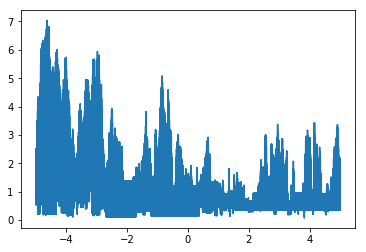

In [134]:
import matplotlib.pyplot as plt
n = np.linspace(-5,5,len(walker1))
print(walker1.shape)

plt.figure()
plt.plot(n,walker1)

[[ 0.44671271  0.63508895  0.78579858  0.68561608]
 [ 0.77274892  0.27178438  0.45165792  0.62519822]
 [ 0.85600371  0.34215701  0.49808745  0.61579452]]
[ 0.44671271  0.63508895  0.78579858  0.68561608  0.77274892  0.27178438
  0.45165792  0.62519822  0.85600371  0.34215701  0.49808745  0.61579452]
